In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from dynaconf import Dynaconf

from llmcoder.utils import get_config_dir, get_data_dir

In [3]:
# Get all configs
config_dir = get_config_dir()
config_file_list = sorted(file for file in os.listdir(config_dir) if file.endswith(".yaml"))
config_list = [Dynaconf(settings_file=os.path.join(config_dir, config_name)) for config_name in config_file_list]
config_name_list = [os.path.splitext(config_name)[0] for config_name in config_file_list]

for config_name in config_name_list:
    print(config_name)

level_0__ft__mypy__5_steps__1_choice
level_0__ft__mypy_signature_5_steps__1_choice
level_0__ft__mypy_signature_5_steps__3_choices
level_0__ft__mypy_signature_gptscore_5_steps__3_choices
level_0__ft__no_analyzers__1_step
level_0__gpt-3.5__no_analyzers__1_step
level_1__ft__mypy__5_steps__1_choice
level_1__ft__mypy_signature_5_steps__1_choice
level_1__ft__mypy_signature_5_steps__3_choices
level_1__ft__mypy_signature_gptscore_5_steps__3_choices
level_1__ft__no_analyzers__1_step
level_1__gpt-3.5__no_analyzers__1_step
level_2__ft__mypy__5_steps__1_choice
level_2__ft__mypy_signature_5_steps__1_choice
level_2__ft__mypy_signature_5_steps__3_choices
level_2__ft__mypy_signature_gptscore_5_steps__3_choices
level_2__ft__no_analyzers__1_step
level_2__gpt-3.5__no_analyzers__1_step


In [4]:
# /data/name/of/dataset/eval/<config_name>/<run_id>/metrics.csv

In [5]:
# Load all metrics.csv files into a dict
metrics_dict = {}

for config_name, config in zip(config_name_list, config_list):
    dataset = config.get('dataset')
    path_to_eval = os.path.join(get_data_dir(dataset), 'eval', config_name)

    metrics_dict[config_name] = {}

    for run_id in os.listdir(path_to_eval):
        path_to_metrics = os.path.join(path_to_eval, run_id, 'metrics.csv')
        if os.path.exists(path_to_metrics):
            with open(path_to_metrics, 'r') as f:
                metrics_dict[config_name][run_id] = pd.read_csv(f, index_col=0)

In [6]:
# Dimensions: (config, run, example, metric)

In [7]:
metrics_dict['level_0__ft__mypy__5_steps__1_choice']['2024-01-13_16-46-25']

,levenshtein_distance_score,bleu_score,trf_similarity_score,sequence_matcher_score,gpt_reviewer_score,loops_required_score,tokens_used_score,agility_score,time_score
0,0,1.000000,1.000000,1.000000,0.0,0,299,0.0,0.510669
1,298,0.111787,0.813752,0.456835,0.0,0,1075,0.0,1.627634
2,255,0.296616,0.693067,0.419530,-4.0,5,3955,0.0,18.539025
3,93,0.381036,0.855461,0.686869,-2.0,0,481,0.0,0.694365


## Average across runs

In [8]:
for k, v in metrics_dict.items():
    metrics_dict[k]['mean'] = pd.concat(v.values()).groupby(level=0).mean()
    metrics_dict[k]['std'] = pd.concat(v.values()).groupby(level=0).std()
    metrics_dict[k]['median'] = pd.concat(v.values()).groupby(level=0).median()
    metrics_dict[k]['min'] = pd.concat(v.values()).groupby(level=0).min()
    metrics_dict[k]['max'] = pd.concat(v.values()).groupby(level=0).max()
    metrics_dict[k]['25%'] = pd.concat(v.values()).groupby(level=0).quantile(0.25)
    metrics_dict[k]['75%'] = pd.concat(v.values()).groupby(level=0).quantile(0.75)

In [9]:
# Split the metrics into `level_0`, `level_1`, and `level_2` difficulties
metrics_dict_levels = {}

for k, v in metrics_dict.items():
    level = k.split('__')[0]

    if level not in metrics_dict_levels:
        metrics_dict_levels[level] = {}

    metrics_dict_levels[level][k] = v

In [10]:
metrics_dict_levels['level_0']['level_0__ft__mypy__5_steps__1_choice']['mean']

,levenshtein_distance_score,bleu_score,trf_similarity_score,sequence_matcher_score,gpt_reviewer_score,loops_required_score,tokens_used_score,agility_score,time_score
0,0.0,1.000000,1.000000,1.000000,0.0,0.0,299.0,0.0,0.514487
1,298.5,0.109268,0.800504,0.441030,0.5,2.5,3332.0,0.0,20.665795
2,312.0,0.148308,0.380148,0.217517,-7.0,3.0,2701.0,0.5,14.006182
3,93.0,0.381036,0.855461,0.686869,-2.0,0.0,481.0,0.0,0.731782


In [11]:
metric_names = list(metrics_dict_levels['level_0']['level_0__ft__mypy__5_steps__1_choice']['mean'].columns)

In [12]:
for config_name in config_name_list:
    print(config_name)

level_0__ft__mypy__5_steps__1_choice
level_0__ft__mypy_signature_5_steps__1_choice
level_0__ft__mypy_signature_5_steps__3_choices
level_0__ft__mypy_signature_gptscore_5_steps__3_choices
level_0__ft__no_analyzers__1_step
level_0__gpt-3.5__no_analyzers__1_step
level_1__ft__mypy__5_steps__1_choice
level_1__ft__mypy_signature_5_steps__1_choice
level_1__ft__mypy_signature_5_steps__3_choices
level_1__ft__mypy_signature_gptscore_5_steps__3_choices
level_1__ft__no_analyzers__1_step
level_1__gpt-3.5__no_analyzers__1_step
level_2__ft__mypy__5_steps__1_choice
level_2__ft__mypy_signature_5_steps__1_choice
level_2__ft__mypy_signature_5_steps__3_choices
level_2__ft__mypy_signature_gptscore_5_steps__3_choices
level_2__ft__no_analyzers__1_step
level_2__gpt-3.5__no_analyzers__1_step


In [16]:
def sorted_config_names(level):
    return [
        f"level_{level}__gpt-3.5__no_analyzers__1_step",
        f"level_{level}__ft__no_analyzers__1_step",
        f"level_{level}__ft__mypy__5_steps__1_choice",
        f"level_{level}__ft__mypy_signature_5_steps__1_choice",
        f"level_{level}__ft__mypy_signature_5_steps__3_choices",
        f"level_{level}__ft__mypy_signature_gptscore_5_steps__3_choices",
    ]

def config_name_short(config_name):
    match '__'.join(config_name.split('__')[1:]):
        case 'gpt-3.5__no_analyzers__1_step': return 'GPT-3.5, 1 step'
        case 'ft__no_analyzers__1_step': return 'FT, 1 step'
        case 'ft__mypy__5_steps__1_choice': return 'FT+Mypy'
        case 'ft__mypy_signature_5_steps__1_choice': return 'FT+Mypy+Sig'
        case 'ft__mypy_signature_5_steps__3_choices': return 'FT+Mypy+Sig, 3 choices'
        case 'ft__mypy_signature_gptscore_5_steps__3_choices': return 'FT+Mypy+Sig+GPT, 3 choices'
        case _: return config_name

def maximize_or_minimize(metric_name):
    return {
        "levenshtein_distance_score": -1,
        "bleu_score": -1,
        "trf_similarity_score": 1,
        "sequence_matcher_score": 1,
        "gpt_reviewer_score": 1,
        "loops_required_score": -1,
        "tokens_used_score": -1,
        "agility_score": 1,
        "time_score": -1
    }[metric_name]

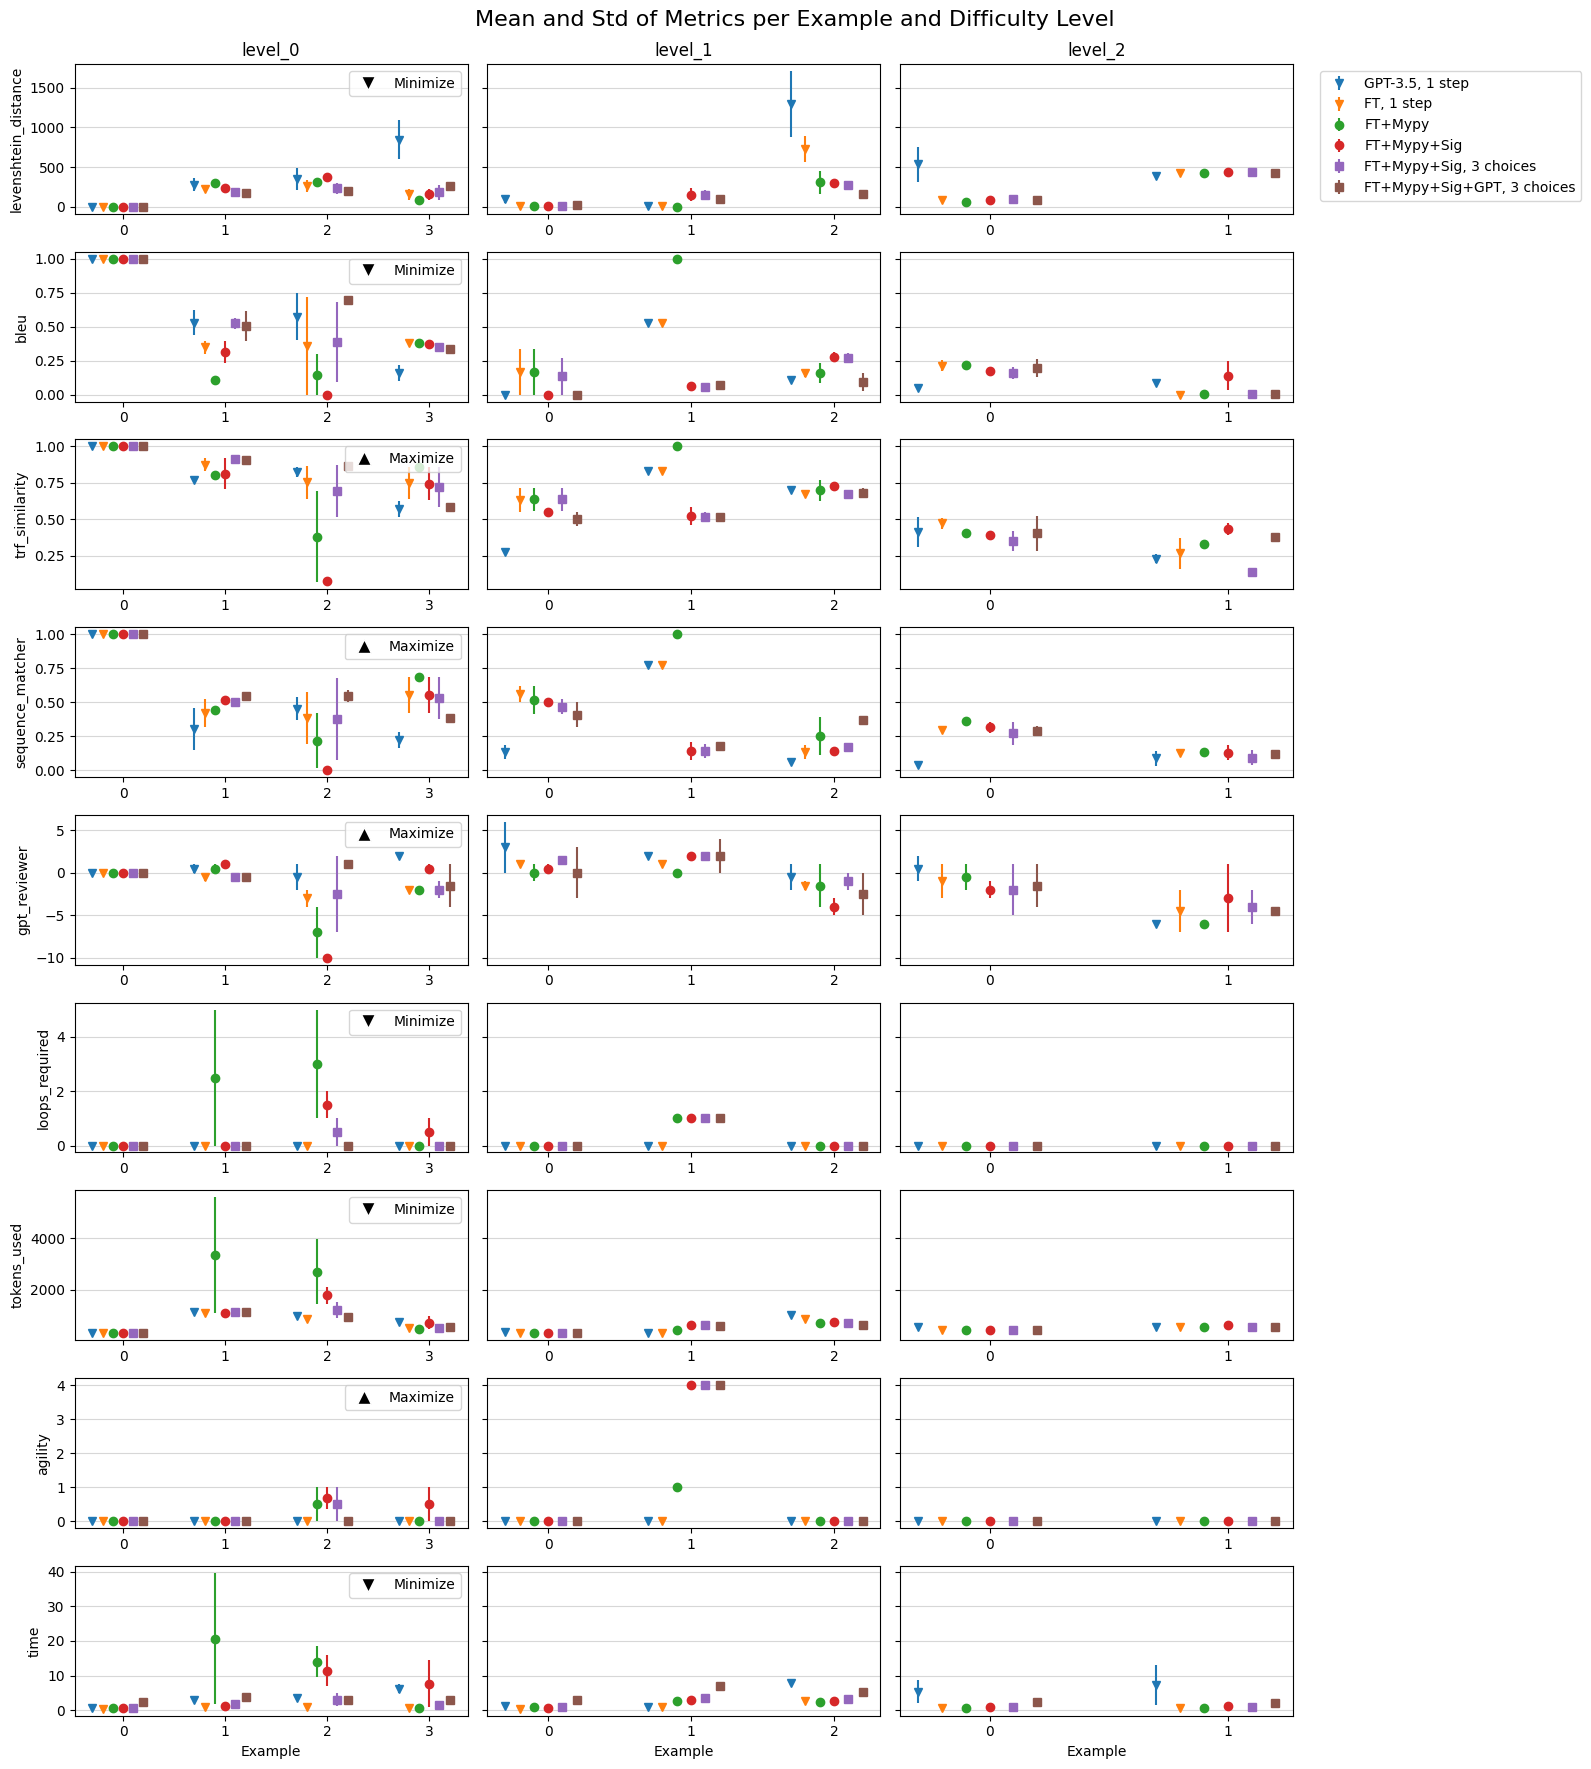

In [26]:
fig, axes = plt.subplots(len(metric_names), 3, figsize=(16, len(metric_names)*2), sharey='row')

for i, (metric, ax_row) in enumerate(zip(metric_names, axes)):
    for level, ax in enumerate(ax_row):
        for c, config_name in enumerate(sorted_config_names(level)):
            metrics = metrics_dict_levels[f'level_{level}'][config_name]

            x = metrics['mean'].index + 0.1 * (c - len(sorted_config_names(level)) / 2)
            y = metrics['mean'][metric]
            yerr = metrics['std'][metric]

            if '3_choice' in config_name:
                fmt = 's'
            elif '1_step' in config_name:
                fmt = 'v'
            else:
                fmt = 'o'

            ax.errorbar(x, y, yerr=yerr, fmt=fmt, label=config_name_short(config_name))

            ax.set_xticks(metrics['mean'].index)

        if i == 0:
            ax.set_title(f'level_{level}')
        elif i == len(metric_names) - 1:
            ax.set_xlabel('Example')

        if level == 0:
            ax.set_ylabel('_'.join(metric.split('_')[:-1]))

            # Add a legend stating whether the metric is subject to minimization or maximization
            if maximize_or_minimize(metric) == 1:
                handles = [plt.Line2D([0], [0], marker='^', color='w', label='Maximize', markerfacecolor='k', markersize=10)]
            else:
                handles = [plt.Line2D([0], [0], marker='v', color='w', label='Minimize', markerfacecolor='k', markersize=10)]

            ax.legend(handles=handles, loc='upper right')

        ax.grid(axis='y', alpha=0.5)


axes[0, -1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

fig.tight_layout()

fig.suptitle('Mean and Std of Metrics per Example and Difficulty Level', fontsize=16) 
fig.subplots_adjust(top=0.95)